Name: Muhammad Hazrat
Email: mh3852@drexel.edu


## CST680 Final Project: Qiskit Implementation of Grover's Algorithm

In [15]:
from qiskit.visualization import plot_histogram  
'''
plot_histogram: Function to plot a histogram of measurement outcomes of quantum circuits.
'''

from qiskit import QuantumCircuit, Aer, execute  
from qiskit.quantum_info import Statevector  
from qiskit.circuit.library import GroverOperator, ZGate


def grovers_algorithm(num_of_qubits, oracle):
    quantum_circuit = QuantumCircuit(num_of_qubits)
    quantum_circuit.h(range(num_of_qubits))

    grover_operator = GroverOperator(oracle, insert_barriers=True)
    num_of_iterations = round((3.14 / 4) * (2 ** (num_of_qubits / 2)))

    for _ in range(num_of_iterations):
        quantum_circuit.append(grover_operator, range(num_of_qubits))

    quantum_circuit.measure_all()
    return quantum_circuit


def oracle_for_marked_state(marked_state):
    oracle_circuit = QuantumCircuit(len(marked_state))

    for qubit, bit in enumerate(marked_state):
        if bit == '0':
            oracle_circuit.x(qubit)

    oracle_circuit.append(ZGate().control(len(marked_state) - 1), range(len(marked_state)))

    for qubit, bit in enumerate(marked_state):
        if bit == '0':
            oracle_circuit.x(qubit)

    return oracle_circuit

In [16]:
# Example usage
number_of_qubits = 3
marked_state = '101'  
oracle = oracle_for_marked_state(marked_state)  
grover_circuit = grovers_algorithm(number_of_qubits, oracle)

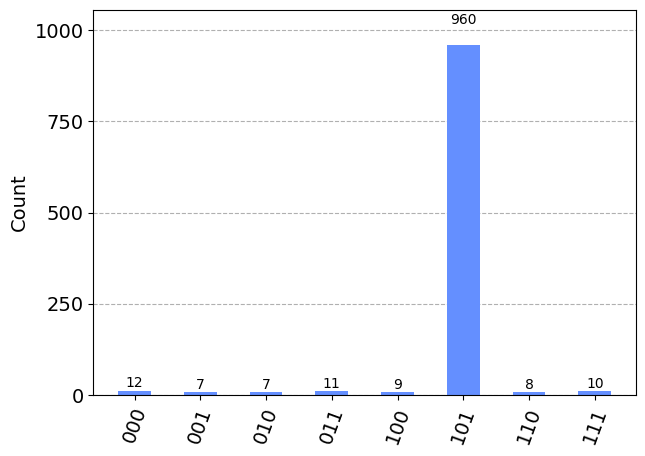

In [17]:
# Simulate the circuit
quantum_simulator = Aer.get_backend('qasm_simulator')
simulation_result = execute(grover_circuit, quantum_simulator, shots=1024).result()
outcome_counts = simulation_result.get_counts(grover_circuit)

# Plot the result
plot_histogram(outcome_counts)